In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix,accuracy_score,r2_score, matthews_corrcoef, make_scorer


from sklearn.svm import NuSVC
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import GridSearchCV

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE


import imblearn

In [32]:
train = pd.read_csv('../train_log.csv')

## Définition des mesures

In [33]:
def f1_scorer(clf,X,Y) :
    Y_clf = clf.predict(X)
    score = f1_score(Y,Y_clf)
    return score


def cv_f1_score(clf,X,Y) :
    Y_clf = clf.predict(X)
    score = cross_val_score(clf,X,Y,cv=5,scoring = make_scorer(f1_score))
    return score.mean()

def cv_matthew_score(clf,X,Y) :
    Y_clf = clf.predict(X)
    score = cross_val_score(clf, X, Y, cv=3, scoring=make_scorer(matthews_corrcoef))
    return score.mean()


def result_model(model,X,Y) :
    Y_model =model.predict(X)
    f1_scor = f1_score(Y,Y_model)
    print('le f1 score vaut',f1_scor)
    
   # Matrice de confusion
    cm_model = confusion_matrix(Y, Y_model)
    plt.rcParams['figure.figsize'] = (5, 5)
    sns.heatmap(cm_model, annot = True,)
    plt.title(str(model))
    plt.show()
    
    return(Y_model)


# def result_model(model,X,Y) :
#     Y_model =model.predict(X)
#     coef_matt =matthews_corrcoef(Y,Y_model)
#     f1_scor = f1_score(Y,Y_model)
#     #cv_coef_matt = cv_matthew_score(model,X,Y)
#     print('le coeff de Mathew vaut',coef_matt)
#     #print('le coeff cv de Mathew vaut',cv_coef_matt)
#     print('le f1 score vaut',f1_scor)
    
#    # Matrice de confusion


#     cm_model = confusion_matrix(Y, Y_model)
#     plt.rcParams['figure.figsize'] = (5, 5)
#     sns.heatmap(cm_model, annot = True,)
#     plt.title(str(model))
#     plt.show()
    
#     return(Y_model)

## Preprocessing

In [34]:
exp_var = train.columns[:-1]

In [35]:
X = train.iloc[:, :-1]
Y = train['Response']


X_train, X_test, Y_train, Y_test = train_test_split(X, Y,train_size = 0.85)

scaler=StandardScaler() 

X_scal_train = scaler.fit_transform(X_train)
X_scal_test = scaler.transform(X_test) 

X_scal_train = pd.DataFrame(X_scal_train,index= X_train.index, columns=exp_var)
X_scal_test = pd.DataFrame(X_scal_test,index= X_test.index, columns=exp_var)


### Random Forest

le coeff de Mathew vaut 0.2862378148285877
le f1 score vaut 0.40643863179074446


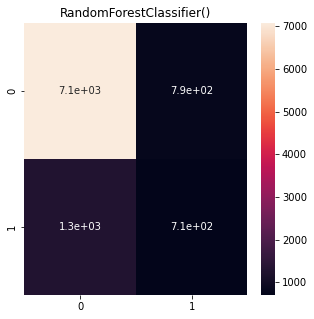

In [32]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
Y_rfc = result_model(rfc, X_test, Y_test)

le coeff de Mathew vaut 0.9998906007990432
le f1 score vaut 0.9999131869085858


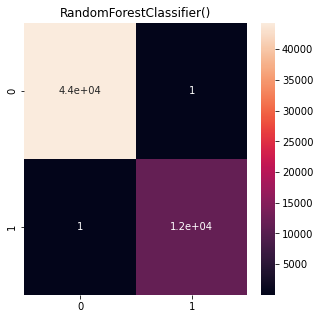

In [33]:
Y_t_rfc = result_model(rfc, X_train, Y_train)

Avec du random under sampler

In [35]:
alpha = 0.75

rus = RandomUnderSampler(sampling_strategy = alpha)
X2_rus , Y2_rus = rus.fit_resample(X_train ,Y_train)

In [ ]:
Y_rfc = result_model(rus, X_test, Y_test)

In [ ]:
rfc = RandomForestClassifier()
h_rfc2 = plot_prediction(list_df,1,rfc)

### SVC

le coeff de Mathew vaut -0.01108935905532685
le f1 score vaut 0.33202434714313767


C:\Users\mathi\.virtualenvs\ISFA-prj-datascience-4Z2Vzt1R\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


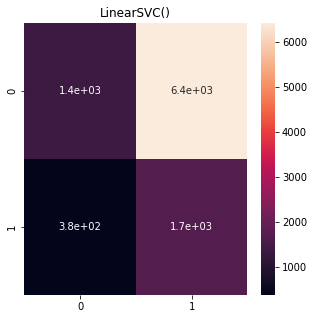

In [36]:
svc = LinearSVC()
svc.fit(X_train, Y_train)
Y_svc = result_model(svc, X_test, Y_test)

### Gradient Boosting regression

In [12]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [18]:
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

In [19]:
gbr = ensemble.GradientBoostingRegressor(**params)
gbr.fit(X_train, Y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, min_samples_split=5,
                          n_estimators=500)

In [24]:
Y_gbr = result_model(gbr, X_test, Y_test)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

### XGBoost

In [38]:
X2 = X
Y2 = Y


X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2,train_size = 0.85)

scaler=StandardScaler() 

X2_scal_train = scaler.fit_transform(X2_train)
X2_scal_test = scaler.transform(X2_test) 

X2_scal_train = pd.DataFrame(X2_scal_train,index= X2_train.index, columns=exp_var)
X2_scal_test = pd.DataFrame(X2_scal_test,index= X2_test.index, columns=exp_var)


In [40]:

xgb = XGBClassifier(max_depth = 10,learning_rate = 0.3)

def model_imb2(alpha,model) :
    rus = RandomUnderSampler(sampling_strategy = alpha)
    X2_rus , Y2_rus = rus.fit_resample(X2_train ,Y2_train)


    model.fit(X2_rus,Y2_rus)

    return model

In [41]:
rus1 = RandomUnderSampler(sampling_strategy = 1)
X2_rus1_test , Y2_rus1_test = rus1.fit_resample(X2_test ,Y2_test)

In [60]:
xgb = XGBClassifier(max_depth = 10,learning_rate = 0.3)
list_model = []
list_alpha =  np.linspace(0.5,1,10)
score_alpha = []
for i in list_alpha :
    a = model_imb2(i,xgb)
    list_model.append(a)
    f1 = f1_scorer(a,X2_rus1_test , Y2_rus1_test)
    score_alpha.append(f1)
    

C:\Users\mathi\.virtualenvs\ISFA-prj-datascience-4Z2Vzt1R\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:35:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\mathi\.virtualenvs\ISFA-prj-datascience-4Z2Vzt1R\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:35:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\mathi\.virtualenvs\ISFA-prj-datascience-4Z2Vzt1R\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:35:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\mathi\.virtualenvs\ISFA-prj-datascience-4Z2Vzt1R\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:35:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\mathi\.virtualenvs\ISFA-prj-datascience-4Z2Vzt1R\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:35:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\mathi\.virtualenvs\ISFA-prj-datascience-4Z2Vzt1R\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:35:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\mathi\.virtualenvs\ISFA-prj-datascience-4Z2Vzt1R\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:35:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\mathi\.virtualenvs\ISFA-prj-datascience-4Z2Vzt1R\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:35:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\mathi\.virtualenvs\ISFA-prj-datascience-4Z2Vzt1R\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:35:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\mathi\.virtualenvs\ISFA-prj-datascience-4Z2Vzt1R\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:35:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [61]:
#Ajout du modèle sans resampling


list_alpha = [0.12] + list(list_alpha)
xgb = XGBClassifier(max_depth = 10,learning_rate = 0.3)
xgb.fit(X2_train,Y2_train)


list_model = [xgb]+list_model 
f12 = f1_scorer(xgb,X2_rus1_test , Y2_rus1_test)
score_alpha = [f12] + score_alpha 

C:\Users\mathi\.virtualenvs\ISFA-prj-datascience-4Z2Vzt1R\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:36:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [62]:
#Calcul de score pour la base de test originale

score_alpha_original = []
for i in range(0,len(list_model)) :
    a = list_model[i]
    f1 = f1_scorer(a,X2_test , Y2_test)
    score_alpha_original.append(f1)

Text(0.5, 1.0, 'Evolution du f1 score en fonction de alpha')

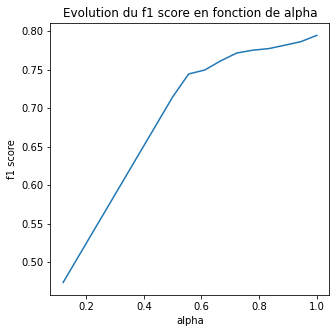

In [63]:
plt.plot(list_alpha,score_alpha)
plt.xlabel('alpha')
plt.ylabel('f1 score')
plt.title('Evolution du f1 score en fonction de alpha')